In [1]:
from pathlib import Path 
import re
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
from matplotlib import rcParams

Here, the .csv files for each of the 10 years with complete record are loaded and sorted into ascending numerical order:

In [2]:
# code source: https://stackoverflow.com/questions/62941378/how-to-sort-glob-glob-numerically

file_pattern = re.compile(r'.*?(\d+).*?')

def get_order(file):
    match = file_pattern.match(Path(file).name)
    if not match:
        return math.inf
    return int(match.groups()[0])

sorted_files = sorted(glob.glob(f'{os.getcwd()}/*.csv'), key=get_order)
sorted_files

['/Users/dilemmajayne/Dropbox/NunatsiavutFutures/CoastalErosion_WebbsBay/Tides/Decomposition_results/ComponentsAmplitude_1965.csv',
 '/Users/dilemmajayne/Dropbox/NunatsiavutFutures/CoastalErosion_WebbsBay/Tides/Decomposition_results/ComponentsAmplitude_1967.csv',
 '/Users/dilemmajayne/Dropbox/NunatsiavutFutures/CoastalErosion_WebbsBay/Tides/Decomposition_results/ComponentsAmplitude_1970.csv',
 '/Users/dilemmajayne/Dropbox/NunatsiavutFutures/CoastalErosion_WebbsBay/Tides/Decomposition_results/ComponentsAmplitude_1971.csv',
 '/Users/dilemmajayne/Dropbox/NunatsiavutFutures/CoastalErosion_WebbsBay/Tides/Decomposition_results/ComponentsAmplitude_2001.csv',
 '/Users/dilemmajayne/Dropbox/NunatsiavutFutures/CoastalErosion_WebbsBay/Tides/Decomposition_results/ComponentsAmplitude_2010.csv',
 '/Users/dilemmajayne/Dropbox/NunatsiavutFutures/CoastalErosion_WebbsBay/Tides/Decomposition_results/ComponentsAmplitude_2014.csv',
 '/Users/dilemmajayne/Dropbox/NunatsiavutFutures/CoastalErosion_WebbsBay/Tid

Here, the data from those files is combined into a single DataFrame:

In [3]:
li = []

for filename in sorted_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['Name File'] = os.path.basename(filename)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame.rename( columns={'Unnamed: 0':'Components'}, inplace=True )

Here, a DataFrame is generated that stores the four largest tidal components according to the pytides decomposition for each year of record:

In [4]:
d = {'year': ['1965', '1967', '1970', '1971', '2001', '2010', '2014', '2015', '2016', '2017'],
    'C1': ['R2', 'S2', 'S1', 'S1', 'S1', 'S1', 'S1', 'S1', 'S1', 'T2'],
    'C2': ['T2', 'R2', 'P1', 'P1', 'P1', 'P1', 'T2', 'R2', 'K1', 'R2'],
    'C3': ['S1', 'T2', 'K1', 'K1', 'K1', 'K1', 'K2', 'K1', 'P1', 'K2'],
    'C4': ['K2', 'K2', 'R2', 'R2', 'R2', 'L2', 'R2', 'P1', 'K2', 'S2']}

top_comps = pd.DataFrame(data=d)
top_comps

,year,C1,C2,C3,C4
0,1965,R2,T2,S1,K2
1,1967,S2,R2,T2,K2
2,1970,S1,P1,K1,R2
3,1971,S1,P1,K1,R2
4,2001,S1,P1,K1,R2
5,2010,S1,P1,K1,L2
6,2014,S1,T2,K2,R2
7,2015,S1,R2,K1,P1
8,2016,S1,K1,P1,K2
9,2017,T2,R2,K2,S2


A list containing the years on record is generated:

In [5]:
years = ['1965', '1967', '1970', '1971', '2001', '2010', '2014', '2015', '2016', '2017']

Here, the DataFrame containing all years of record is divided up by some of the important tidal components:

In [6]:
S1 = pd.DataFrame(frame.loc[frame['Components']=='S1'])
S1['year']=years

In [7]:
P1 = pd.DataFrame(frame.loc[frame['Components']=='P1'])
P1['year']=years

In [8]:
K1 = pd.DataFrame(frame.loc[frame['Components']=='K1'])
K1['year']=years

In [9]:
R2 = pd.DataFrame(frame.loc[frame['Components']=='R2'])
R2['year']=years

Here, the trend over time for the important tidal components is visualized:

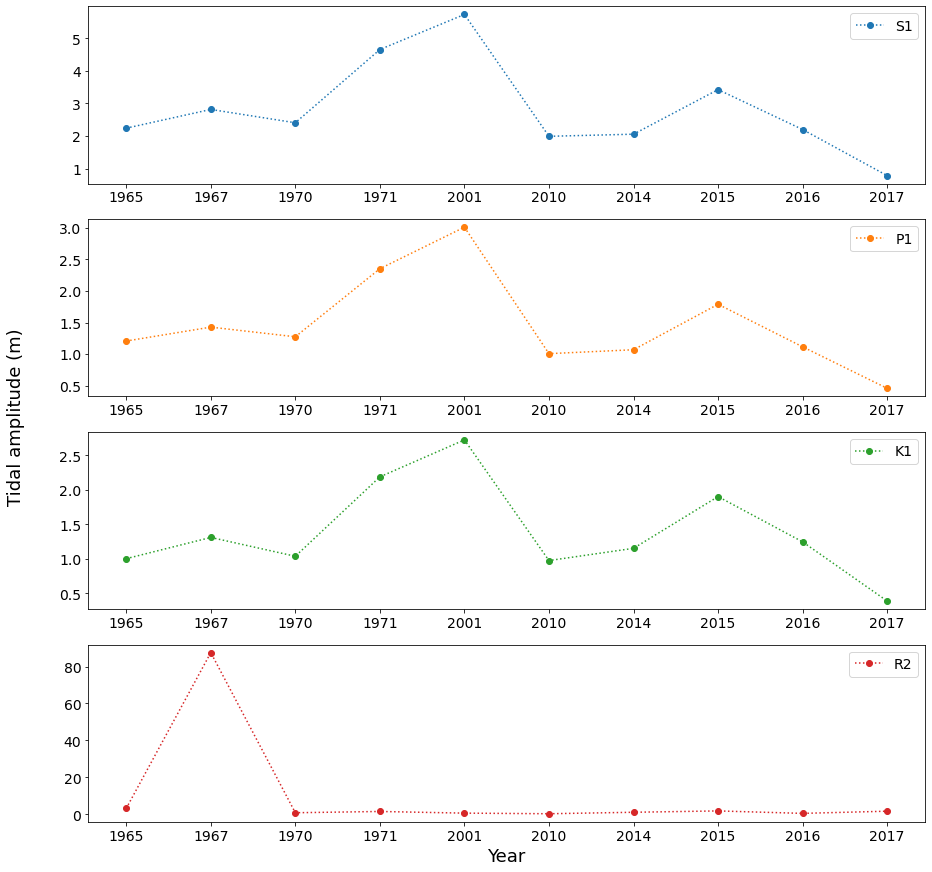

In [16]:
rcParams['legend.fontsize'] = 14
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['axes.labelsize'] = 18

fig, (ax, ax1, ax2, ax3) = plt.subplots(4,1, figsize=(15,15))

ax.plot(S1['year'], S1['amplitude (m)'], ':o', label='S1')
ax.legend()

ax1.plot(P1['year'], P1['amplitude (m)'],':o', color='tab:orange', label='P1')
ax1.legend()

ax2.plot(K1['year'], K1['amplitude (m)'], ':o', color='tab:green', label='K1')
ax2.legend()

ax3.plot(R2['year'], R2['amplitude (m)'], ':o', color='tab:red', label='R2')
ax3.legend()

ax3.set_xlabel('Year')

fig.supylabel('Tidal amplitude (m)', x=0.05, fontsize=18)

plt.show()